# Performing a Dark Matter Search.

### Goals

1. To perform a search for dark matter using the selection criteria you devised in the previous notebook.
2. To understand how to interpret the results of you search, and decide if you should book a ticket to Stockholm or not.

### Timing

1. Try to finish this notebook in 30-35 minutes.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scipy
import datetime

# Let's do a simple search for dark matter


In the last notebook, we learned about cuts, signal acceptance, and background rejection while comparing neutron (signal-like) calibration data and $\beta$ (background-like) calibration data. Now, let's put these together and try to do a simple search for dark matter. 

We're now going to look at a single file of data, collected from a simulated detector exposure. Now, we don't have any prior knowledge about which events are signal-like and which are background-like - they're all lumped together into one dataset now. <b>And remember: dark matter may or may not be able to scatter on normal nuclei, so it's not a certainty that there are even ANY signal-like events in this dataset!</b> 

I'm including here the acceptance and leakage plots from the previous notebook, for you to reference.

<img src="figures/Leakage.png" width="400"/>

Number of total events recorded in observing period: 300


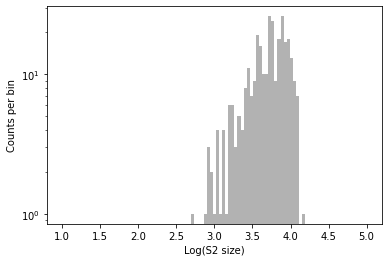

In [2]:
#First, load in the data from our DM search
DMSearch_data = np.loadtxt(open("../data/DMSearch_data.txt",'r')) #DON'T LOOK IN THIS FILE UNTIL END OF THE NOTEBOOK!

#Take the S2 values from the search data and plot in a histogram.
data_logS2Bins = np.linspace(1,5,100)
data_logS2 = np.log10(DMSearch_data[:])

print(f"Number of total events recorded in observing period: {data_logS2.size}")

#Plot these events 
plt.hist(data_logS2, bins=data_logS2Bins,fc=(0, 0, 0, 0.3))
plt.xlabel(r'Log(S2 size)')
plt.ylabel(r'Counts per bin')
plt.yscale('log')
plt.show()

# Questions for Discussion

5.1 What are your first impressions here? If some dark matter events are in this plot, where would they show up? Can you conclude on first sight that we have or have not found dark matter? If yes, how many dark matter events do you think we've seen?

Let's now use the cut on Log(S2) (i.e., $X_{c}$) that you chose in the last lab to cut away the events we think are likely to be background. Plug in your cut value into the "myCutValue_Xc" variable in the code below.

<b>Side note: it is important that you do not change your cut value now that you've seen the dark matter search data. If you do, you will introduce bias into your result.</b> (Disclaimer: you will not be graded on your ability to choose an excellent cut, so please just play along with this anti-bias measure ;) )

In [3]:
#Function we use to help us cut away events with S2s above a certain threshold cutVal
def CutEvents(eventList,cutVal):
    
    # make a mask of all the events passing the cuts
    mask = eventList < cutVal
    # apply the mask using the [] operation
    return eventList[mask]

Plug in your cut value from the last notebook in the first line here.

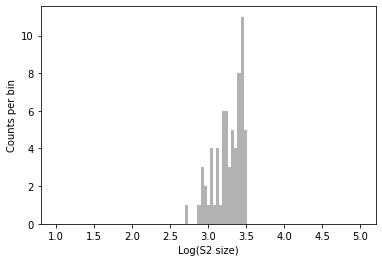

Number of dark matter search events, prior to cut: {data_logS2.size}
Number of dark matter search events remaining after cut: 66


In [4]:
#Plug in your cut value from last lab here!
myCutValue_Xc = 3.5


#Loop through elements and remove those above the cut value
data_logS2_afterCut = CutEvents(data_logS2,myCutValue_Xc)

plt.hist(data_logS2_afterCut, bins=data_logS2Bins,fc=(0, 0, 0, 0.3))
plt.xlabel(r'Log(S2 size)')
plt.ylabel(r'Counts per bin')
plt.yscale('linear')
plt.show()

print("Number of dark matter search events, prior to cut: {data_logS2.size}")
print(f"Number of dark matter search events remaining after cut: {data_logS2_afterCut.size}")

#### 5.2 When you apply the cut, how many events, $N_{ROI}$, survive? 

# Complete this section if you have more than zero remaining events

Okay, so some events survived your cut. Now let's see how statistically significant your $N_{ROI}$ is. 

It's fair to assume that the vast majority of all observed events (pre-cut) are background, so let's approximate the total number of background events by the total number of observed events. 

#### 5.3a What is the average number of background events $N_{ex}$ you expect to leak below your cut value? (This can be a non-integer number.) Hint: you will need to look at the background leakage curve at the top of this notebook, with a knowledge of how many overall events there were.

Now, suppose the probability of observing $N$ background events in this window follows a Poisson distribution with a mean of $N_{ex}$. 

Plug your $N_{ex}$ into the following code, in the first line below.

In [5]:
#Plug in the expected number of events N_ex
N_ex = 30
N_ROI = data_logS2_afterCut.size
probability_from_background = scipy.poisson.sf(N_ROI,N_ex)
print(f"Probability of getting N_ROI events from just background fluctuations: {probability_from_background}")

Probability of getting N_ROI events from just background fluctuations: 4.220659465985886e-09


#### 5.4a What is the probability that you will see $N_{ROI}$ or more events due to just normal background fluctuations? Can you quote a p-value for observing $N_{ROI}$ under the assumption that only background is present?

#### 5.5a In qualitative terms, how confident are you that you discovered dark matter?

# Alternatively, complete this section if you have zero remaining events

Okay, so you have zero remaining events. This suggests that you did not observe dark matter with your experiment. However, this does not mean that the results are not meaningful or exciting.

#### 5.3b Does the fact that you have zero remaining events after your cut mean that that we're certain dark matter didn't scatter in your detector? Why or why not? Refer the signal acceptance plot in your answer.

#### 5.4b How is a null result (one where you don't find dark matter) useful for understanding the properties of dark matter?

# Was there actually dark matter in the simulated dataset? 

Once you get to this point, please ask one of the instructors for spoilers! (Of course, none of them actually knows if there REALLY will be dark matter seen in LUX-ZEPLIN, but stay tuned!)